<a href="https://colab.research.google.com/github/Paulie-Aditya/nlp_practice/blob/main/end_to_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import pandas as pd

In [41]:
df = pd.read_csv('/content/placement.csv')

In [42]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [43]:
df.shape

(100, 4)

In [44]:
df = df.iloc[:,1:] #Preprocessing done

In [45]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [46]:
#Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [47]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [48]:
import matplotlib.pyplot as plt

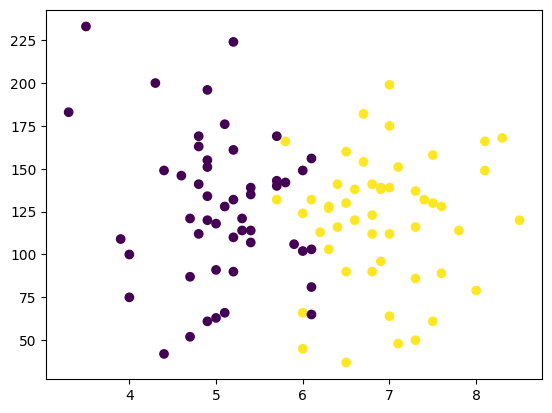

In [49]:
plt.scatter(df['cgpa'],df['iq'], c = df['placement'])

In [50]:
# We will use Logistic Regression

In [51]:
x = df.iloc[:,0:2] #We store independent variables in this (inputs)
y = df.iloc[:,-1] # We store dependent variables (output)

In [52]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [53]:
y.shape

(100,)

In [54]:
#Train Test Split

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test =train_test_split(x,y,test_size = 0.1)

In [56]:
X_train

,cgpa,iq
11,6.9,138.0
84,5.7,169.0
78,6.1,81.0
26,7.0,199.0
37,8.1,149.0
...,...,...
55,7.8,114.0
41,5.4,114.0
77,7.3,50.0
46,5.3,114.0


In [57]:
Y_train

11    1
84    0
78    0
26    1
37    1
     ..
55    1
41    0
77    1
46    0
79    1
Name: placement, Length: 90, dtype: int64

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

In [60]:
X_train = scaler.fit_transform(X_train)

In [61]:
X_train

array([[ 0.75952158,  0.42386937],
       [-0.29347368,  1.21809068],
       [ 0.05752474, -1.03647305],
       [ 0.84727118,  1.98669195],
       [ 1.81251683,  0.70568983],
       [ 0.84727118,  0.44948941],
       [-0.90772091, -1.49763381],
       [ 0.75952158,  0.44948941],
       [-0.7322217 ,  1.01313034],
       [-1.43421853,  0.70568983],
       [ 0.23302395, -0.47283212],
       [-0.7322217 ,  2.62719301],
       [-0.99547051, -0.0372914 ],
       [ 1.2860192 , -1.5488739 ],
       [ 0.75952158, -0.65217241],
       [-0.55672249,  0.34700924],
       [-0.64447209, -0.01167135],
       [ 0.23302395,  0.16766894],
       [ 0.32077355,  0.5007295 ],
       [-0.29347368,  0.47510945],
       [-1.52196814,  2.012312  ],
       [-0.29347368,  0.55196958],
       [-0.99547051,  0.3213892 ],
       [ 2.16351524, -0.0372914 ],
       [ 1.11051999,  0.39824933],
       [-0.7322217 , -0.29349182],
       [-0.8199713 , -1.42077368],
       [-1.43421853, -2.0356547 ],
       [ 1.72476722,

In [62]:
X_test = scaler.transform(X_test)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
clf = LogisticRegression()

In [65]:
# Model Training
clf.fit(X_train, Y_train)

LogisticRegression()

In [66]:
y_pred = clf.predict(X_test)

In [67]:
Y_test

80    0
85    1
43    1
39    0
64    1
23    0
38    1
31    0
97    1
15    0
Name: placement, dtype: int64

In [68]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy_score(Y_test,y_pred)

0.9

In [70]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

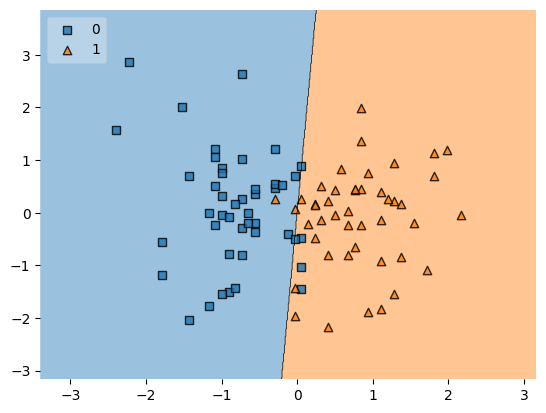

In [71]:
plot_decision_regions(X_train,Y_train.values,clf = clf,legend = 2)

In [72]:
import pickle

In [73]:
pickle.dump(clf,open('model.pkl','wb'))